# Tensorflow Image Recognition Neural Network

## Imports and Set-ups

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Importing Keras Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
CLASS_NAMES = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
train_images.shape

(60000, 28, 28)

## Normalizing Data

<function matplotlib.pyplot.show(*args, **kw)>

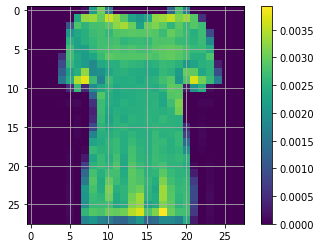

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(1)
plt.show

## Building Keras Model Class

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # input layer
    keras.layers.Dense(128, activation='relu'),   # hidden layer
    keras.layers.Dense(10, activation='softmax')])  # output layer

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Model Training and Testing

In [7]:
model.fit(train_images, train_labels, batch_size=1, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 70s 1ms/step - loss: 0.4999 - accuracy: 0.8222
Epoch 2/2
60000/60000 [==============================] - 67s 1ms/step - loss: 0.4131 - accuracy: 0.8559


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8485
Test accuracy: 0.8485000133514404


## Prediction Set-up

In [ ]:
def make_prediction(data, label, number):
    predictions = model.predict(data)
    expected = CLASS_NAMES[label[number]]
    guess = CLASS_NAMES[np.argmax(predictions[number])]
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(data[number])
    plt.title("Expected: " + expected + " (" + str(label[number]) + ")")
    plt.xlabel("Predicted: " + guess + " (" + str(np.argmax(predictions[number])) + ")")
    plt.subplot(1, 2, 2)
    plt.scatter(range(10), predictions[num][:])
    plt.xticks(np.arange(0, 10))
    plt.gca().get_xticklabels()[np.argmax(predictions[number])].set_color("red")
    if guess == expected:
        print("The prediction is correct!\n")
    else:
        print("The prediction is wrong!\n")
    
def number():
    while 1:
        number = input("Pick a number:")
        if number.isdigit():
            number = int(number)
            if 0 <= number <= 9999:
                return number
            else:
                print("Try again...")

Pick a number: 34


The prediction is correct!



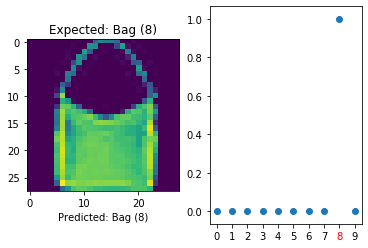

In [18]:
num = number()
make_prediction(test_images, test_labels, num)